# **CAPSTONE PROJECT II - EDA**

**JCDSOL-013-021 NATASHA VERENA LOHANATHA**

# LATAR BELAKANG

Supermarket melakukan program membership sebagai bentuk pengumpulan sampling untuk mengetahui demografik pelanggan dan insight untuk kegiatan marketing supermarket. Rentang waktu data adalah dari Juni 2012 - Juni 2014 (2 tahun).

## Pernyataan Masalah

Supermarket ingin mengetahui siapa kelas pelanggan terbesar mereka, apa kebutuhan mereka dan cara menggapai mereka. Diketahui secara kasar rendahnya angka customer yang ikut berpartisipasi dalam aktifitas kampanye penjualan. Karena itu informasi ini akan digunakan sebagai landasan perencanaan kampanye marketing periode tahun 2014-2015, tipe "always on" maupun periodik sesuai dengan target market untuk meningkatkan partisipasi dan sebagai bentuk tolak ukur naiknya "brand awareness" diantara customer lama maupun yang akan bergabung nantinya. Kedepannya, data ini juga bisa menjadi faktor pertimbangan untuk tim purchasing dan/atau procurement (divisi produk dan pengembangan bisnis) dalam mengkurasikan barang dan menetapkan harga barang yang sesuai dengan target market Supermarket.

## Tujuan

* Mengetahui demografik pelanggan Supermarket berdasarkan kelas pendapatan (Income Class) dan kegiatan berbelanja (Membership)
* Mengetahui barang dengan jumlah purchasing tertinggi berdasarkan kelas pendapatan (Income Class) dan kegiatan berbelanja (Membership)
* Mengetahui channel berbelanja berdasarkan kelas pendapatan (Income Class) dan kegiatan berbelanja (Membership)
* Memprediksi produk unggulan dan bentuk promosi yang sesuai serta menentukan set KPI untuk periode 2014-15 untuk meningkatkan jumlah dan kualitas transaksi di Supermarket

# READ DATA

Berikut dataframe yang akan digunakan setelah melalui proses data cleaning: cleaned_supermarket_customer(4)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats

In [2]:
file_name = "cleaned_supermarket_customer(4).csv"
Cdata = pd.read_csv(file_name, parse_dates=['Dt_Customer'])
Cdata

,ID,Age,Education,Household_Member,Income,Income_Class,Dt_Customer,MntWines,MntFruits,MntMeatProducts,...,RFM_Score,Membership,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,TotAcceptedCmp,Complain
0,5524,57,Graduation,1,58138.0,Medium,2012-09-04,635,88,546,...,11,Bronze Member,3,0,0,0,0,0,0,0
1,2174,60,Graduation,3,46344.0,Medium,2014-03-08,11,1,6,...,4,Platinum Member,2,0,0,0,0,0,0,0
2,4141,49,Graduation,2,71613.0,Medium,2013-08-21,426,49,127,...,9,Silver Member,1,0,0,0,0,0,0,0
3,6182,30,Graduation,3,26646.0,Low,2014-02-10,11,4,20,...,4,Platinum Member,2,0,0,0,0,0,0,0
4,5324,33,PhD,3,58293.0,Medium,2014-01-19,173,43,118,...,10,Bronze Member,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,10870,47,Graduation,3,61223.0,Medium,2013-06-13,709,43,182,...,9,Silver Member,2,0,0,0,0,0,0,0
2201,4001,68,PhD,5,64014.0,Medium,2014-06-10,406,0,30,...,9,Silver Member,7,1,0,0,0,0,1,0
2202,7270,33,Graduation,1,56981.0,Medium,2014-01-25,908,48,217,...,11,Bronze Member,1,0,0,0,1,0,1,0
2203,8235,58,Master,3,69245.0,Medium,2014-01-24,428,30,214,...,8,Silver Member,2,0,0,0,0,0,0,0


### Summary

In [3]:
Cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2205 non-null   int64         
 1   Age                  2205 non-null   int64         
 2   Education            2205 non-null   object        
 3   Household_Member     2205 non-null   int64         
 4   Income               2205 non-null   float64       
 5   Income_Class         2205 non-null   object        
 6   Dt_Customer          2205 non-null   datetime64[ns]
 7   MntWines             2205 non-null   int64         
 8   MntFruits            2205 non-null   int64         
 9   MntMeatProducts      2205 non-null   int64         
 10  MntFishProducts      2205 non-null   int64         
 11  MntSweetProducts     2205 non-null   int64         
 12  MntGoldProds         2205 non-null   int64         
 13  M_ProductPurchase    2205 non-nul

In [4]:
Cdata.isna().sum()

ID                     0
Age                    0
Education              0
Household_Member       0
Income                 0
Income_Class           0
Dt_Customer            0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
M_ProductPurchase      0
Mq_Ranks               0
R_LastPurchase         0
Rq_Ranks               0
NumWebVisitsMonth      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
F_PlacePurchase        0
Fq_Ranks               0
RFM_Score              0
Membership             0
NumDealsPurchases      0
AcceptedCmp1           0
AcceptedCmp2           0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
TotAcceptedCmp         0
Complain               0
dtype: int64

# 1. DEMOGRAFIK PELANGGAN SUPERMARKET

## Numerical

In [4]:
numerik = Cdata.select_dtypes(include='number')
Cdata.describe()

,ID,Age,Household_Member,Income,Dt_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Fq_Ranks,RFM_Score,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,TotAcceptedCmp,Complain
count,2205.000000,2205.000000,2205.000000,2205.000000,2205,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000,2205.000000
mean,5585.439456,45.095692,2.593651,51622.094785,2013-07-10 06:45:33.061224704,306.164626,26.403175,165.312018,37.756463,27.128345,...,2.428118,7.414059,2.318367,0.064399,0.013605,0.073923,0.074376,0.073016,0.29932,0.009070
min,0.000000,18.000000,1.000000,1730.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,2815.000000,37.000000,2.000000,35196.000000,2013-01-16 00:00:00,24.000000,2.000000,16.000000,3.000000,1.000000,...,1.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,5455.000000,44.000000,3.000000,51287.000000,2013-07-08 00:00:00,178.000000,8.000000,68.000000,12.000000,8.000000,...,2.000000,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,8418.000000,55.000000,3.000000,68281.000000,2013-12-31 00:00:00,507.000000,33.000000,232.000000,50.000000,34.000000,...,3.000000,9.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,11191.000000,74.000000,5.000000,113734.000000,2014-06-29 00:00:00,1493.000000,199.000000,1725.000000,259.000000,262.000000,...,4.000000,12.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.00000,1.000000
std,3247.546423,11.705801,0.906197,20713.063826,NaN,337.493839,39.784484,217.784507,54.824635,41.130468,...,1.174026,2.494000,1.886107,0.245518,0.115872,0.261705,0.262442,0.260222,0.68044,0.094827


### distribution

C:\Users\User\AppData\Local\Temp\ipykernel_19828\472395459.py:9: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\User\AppData\Local\Temp\ipykernel_19828\472395459.py:9: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\User\AppData\Local\Temp\ipykernel_19828\472395459.py:9: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\User\AppData\Local\Temp\ipykernel_19828\472395459.py:9: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\User\AppData\Local\Temp\ipykernel_19828\472395459.py:9: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\User\AppData\Local\Temp\ipykernel_19828\472395459.py:9: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\User\AppData\Local\Temp\i

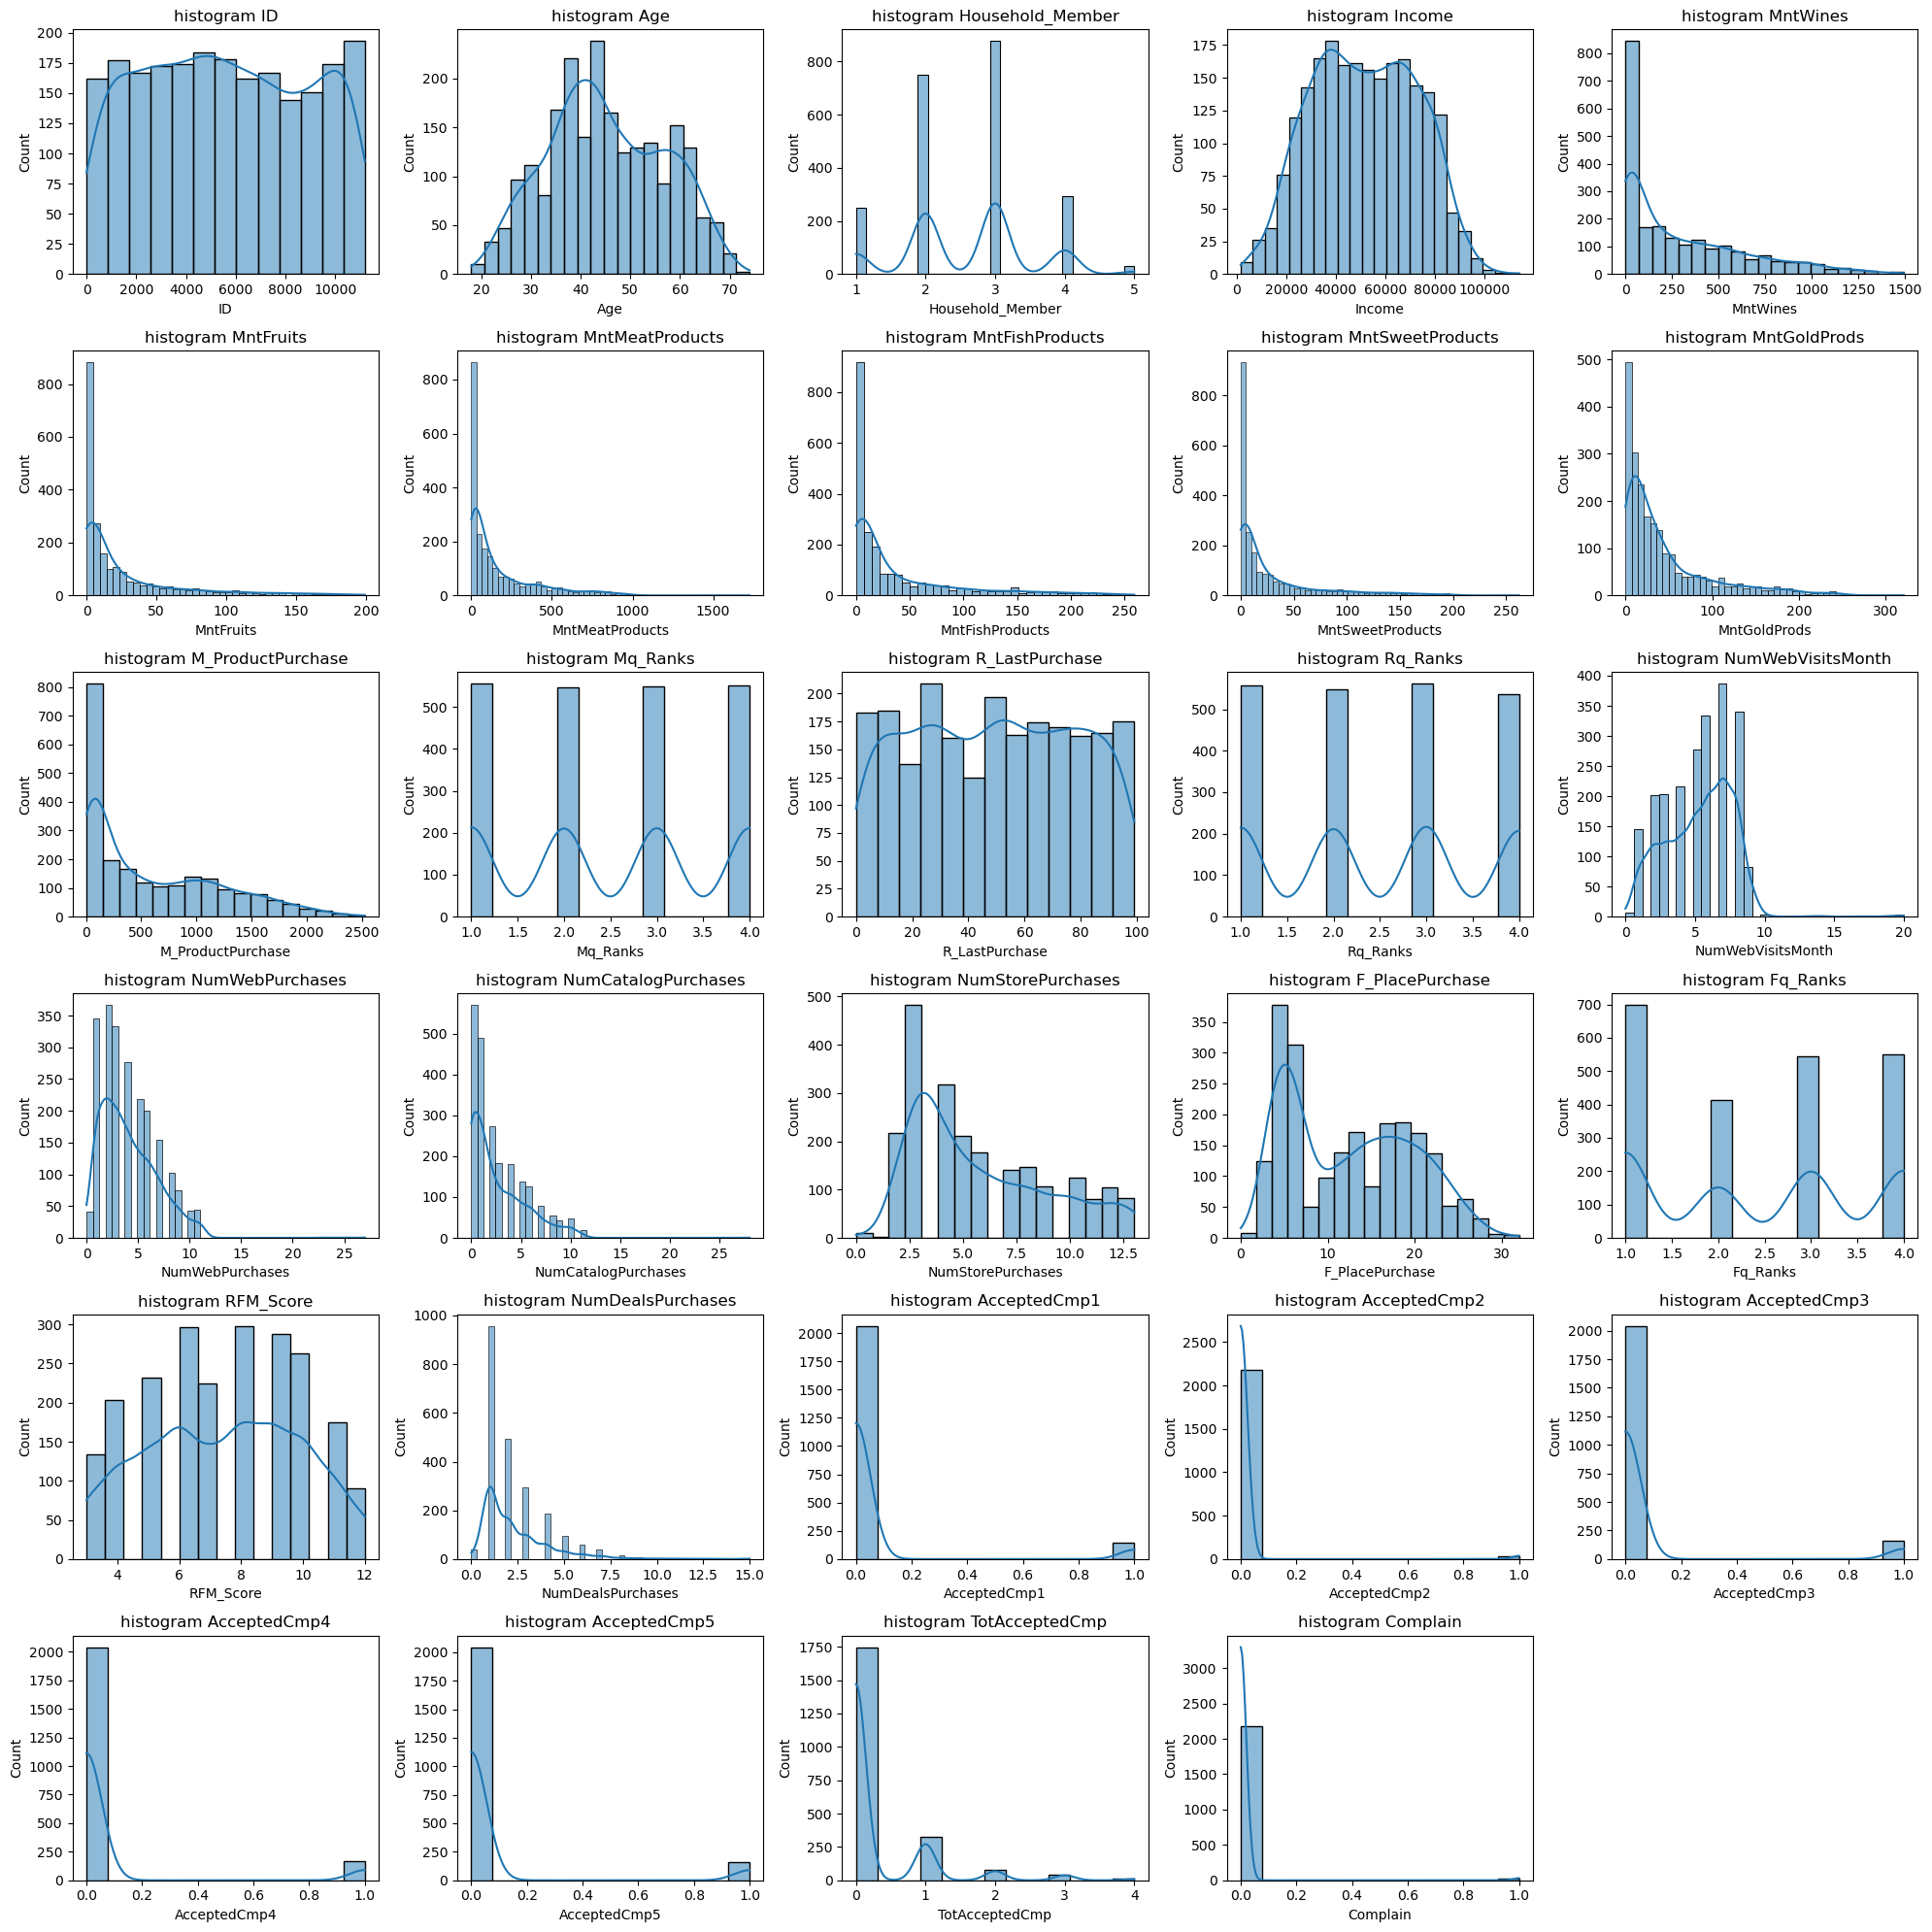

In [5]:
fig = plt.figure(figsize=(20,20)) # horizontal, vertikal

count = 0
for kolom in numerik.columns:
    count += 1
    plt.subplot(6,5,count)
    sns.histplot(numerik[kolom], kde=True)
    plt.title(f"histogram {kolom}")
    fig.tight_layout() # biar tidak tertumpuk
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_19828\1384505938.py:8: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\User\AppData\Local\Temp\ipykernel_19828\1384505938.py:8: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\User\AppData\Local\Temp\ipykernel_19828\1384505938.py:8: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\User\AppData\Local\Temp\ipykernel_19828\1384505938.py:8: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\User\AppData\Local\Temp\ipykernel_19828\1384505938.py:8: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\User\AppData\Local\Temp\ipykernel_19828\1384505938.py:8: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\User\AppData\Local\

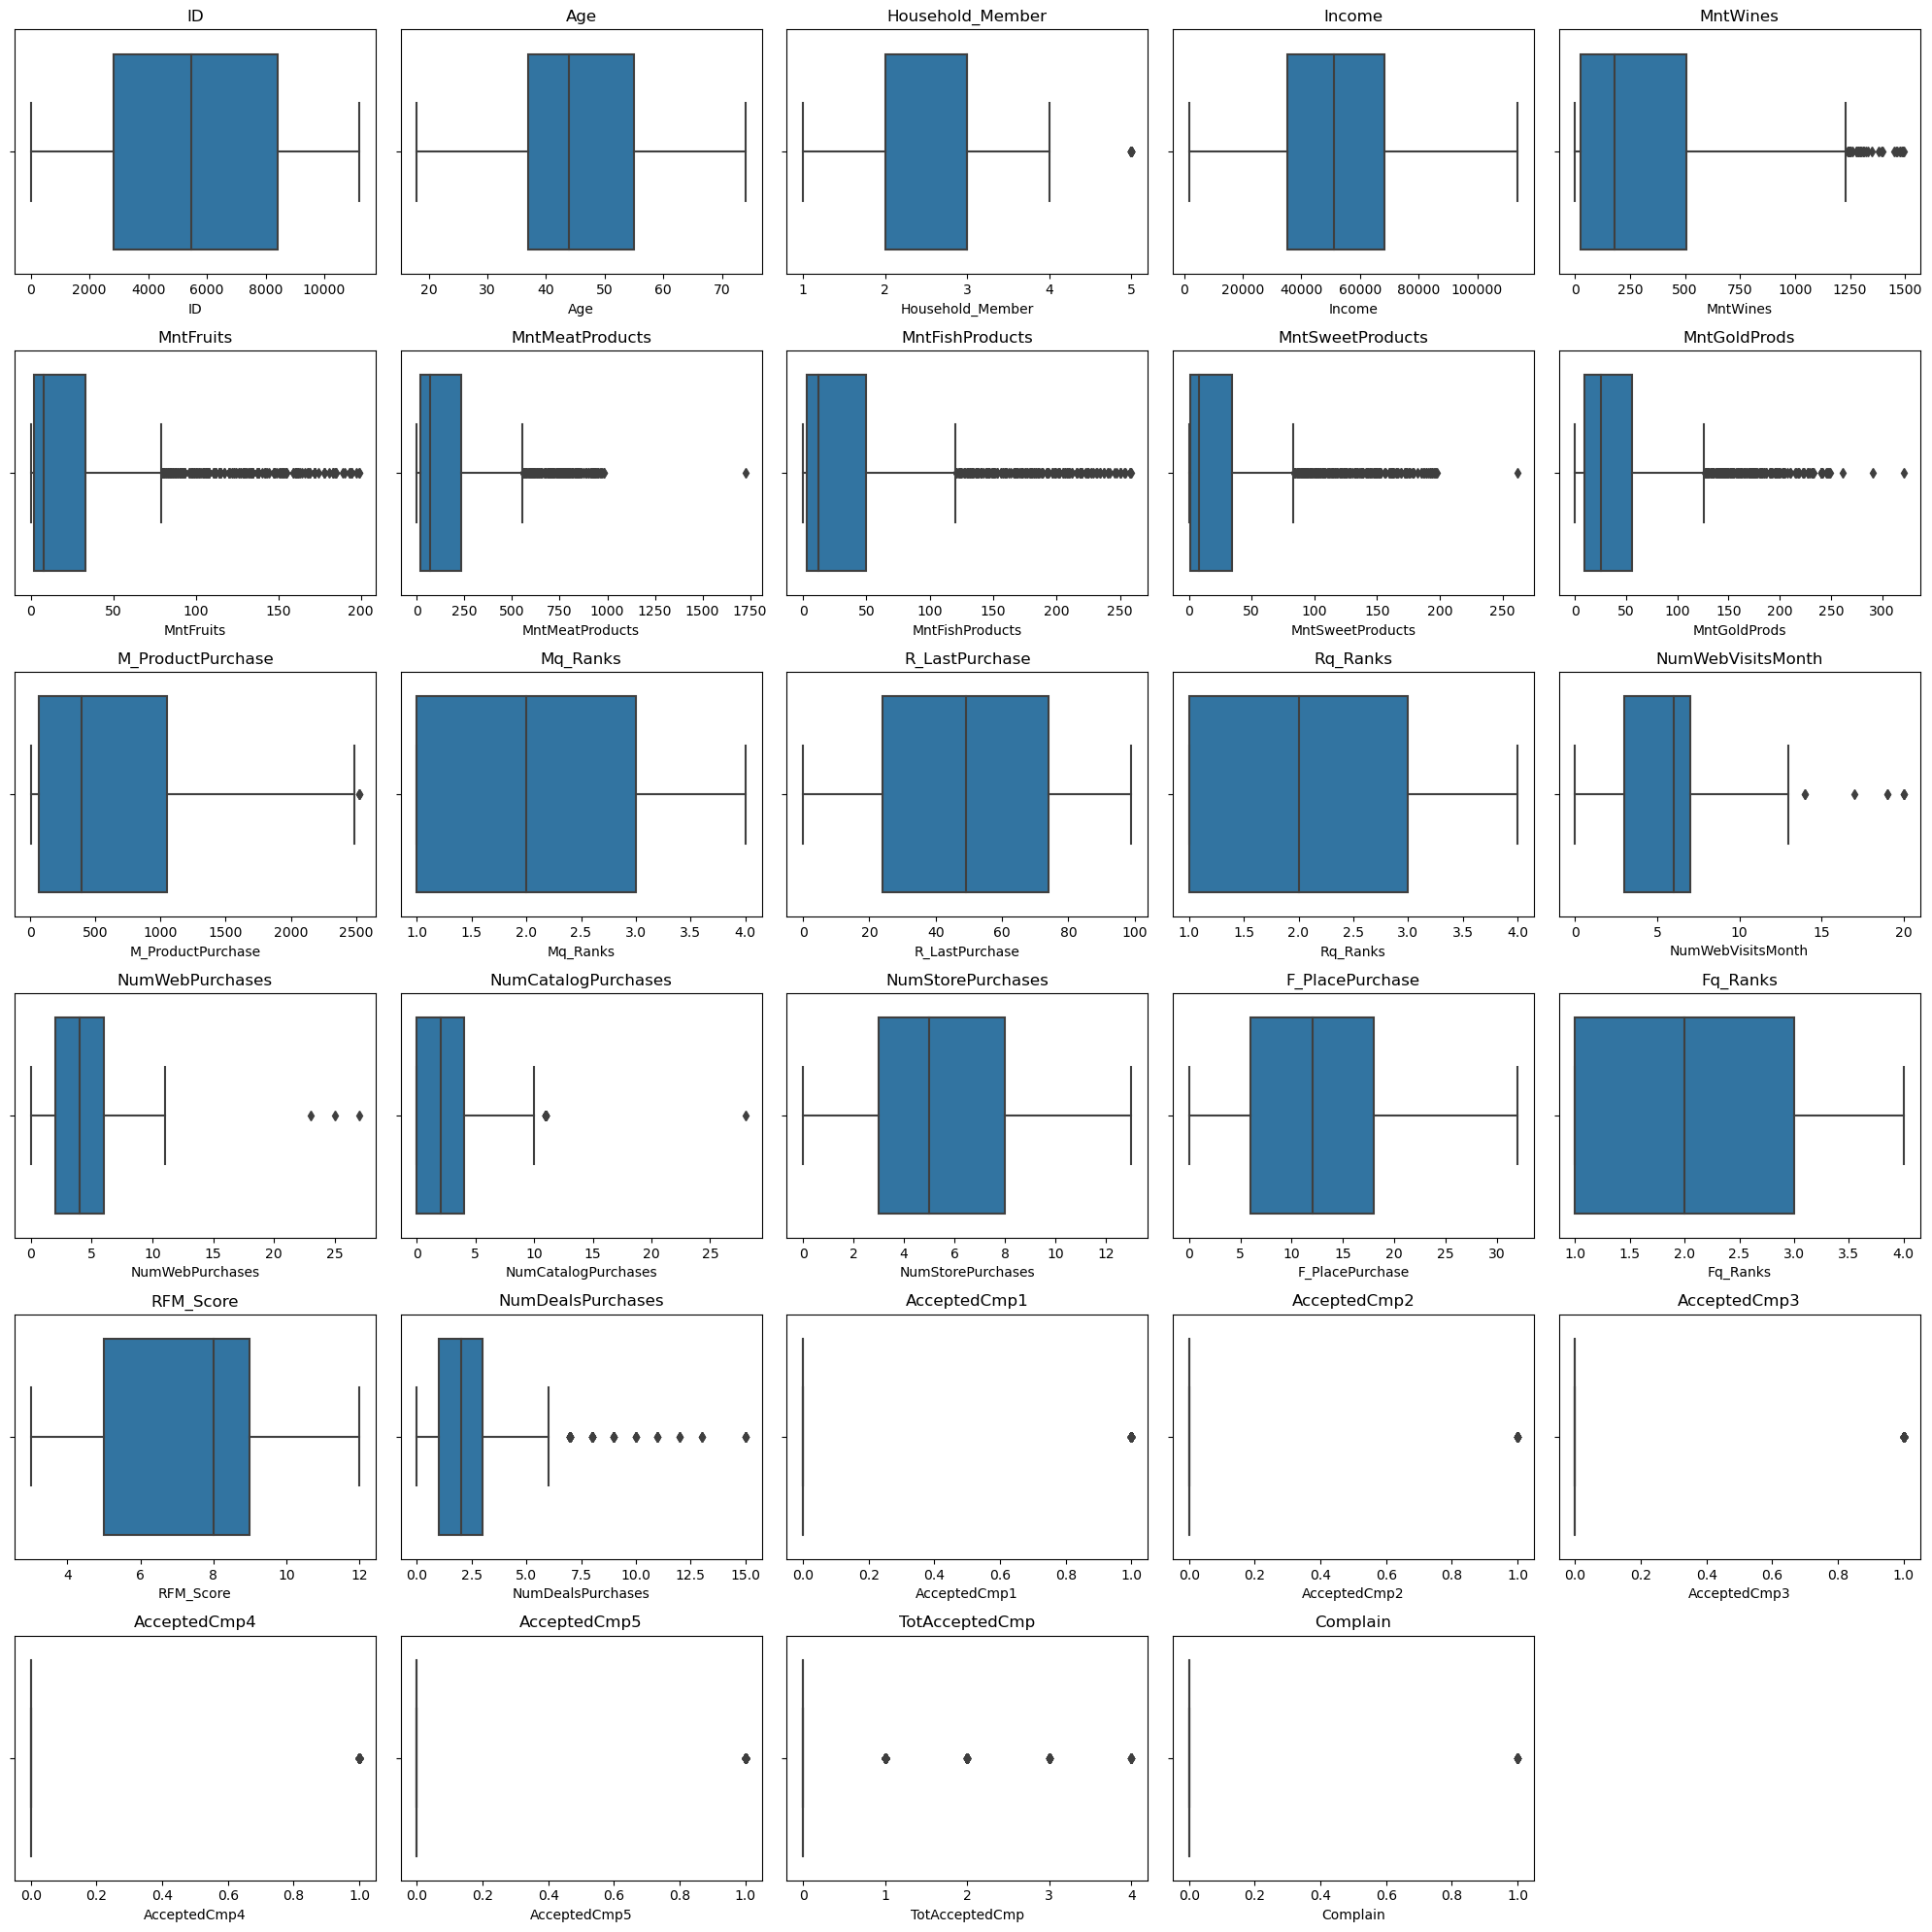

In [6]:
fig = plt.figure(figsize=(20,20)) # horizontal, vertikal

count = 0
for kolom in numerik.columns:
    count += 1
    plt.subplot(6, 5,count)
    sns.boxplot(numerik, x = kolom)
    fig.tight_layout() # biar tidak tertumpuk
    plt.title(f'{kolom}')
plt.show()

Komentar: 
* dominasi umur: 35-55 tahun
* dominasi rumahtangga: 2-3 orang 
* dominasi income: $30.000 - $70.000 

perihal campaign, angka partisipasi per campaign rata-rata hanyalah 10% dari total 2205 member

## Categorical

In [7]:
kategorik = Cdata.select_dtypes(exclude='number')
kategorik

,Education,Income_Class,Dt_Customer,Membership
0,Graduation,Medium,2012-09-04,Bronze Member
1,Graduation,Medium,2014-03-08,Platinum Member
2,Graduation,Medium,2013-08-21,Silver Member
3,Graduation,Low,2014-02-10,Platinum Member
4,PhD,Medium,2014-01-19,Bronze Member
...,...,...,...,...
2200,Graduation,Medium,2013-06-13,Silver Member
2201,PhD,Medium,2014-06-10,Silver Member
2202,Graduation,Medium,2014-01-25,Bronze Member
2203,Master,Medium,2014-01-24,Silver Member


In [8]:
kategorik.describe(include='object')

,Education,Income_Class,Membership
count,2205,2205,2205
unique,3,3,4
top,Graduation,Medium,Silver Member
freq,1167,1324,811


### distribution

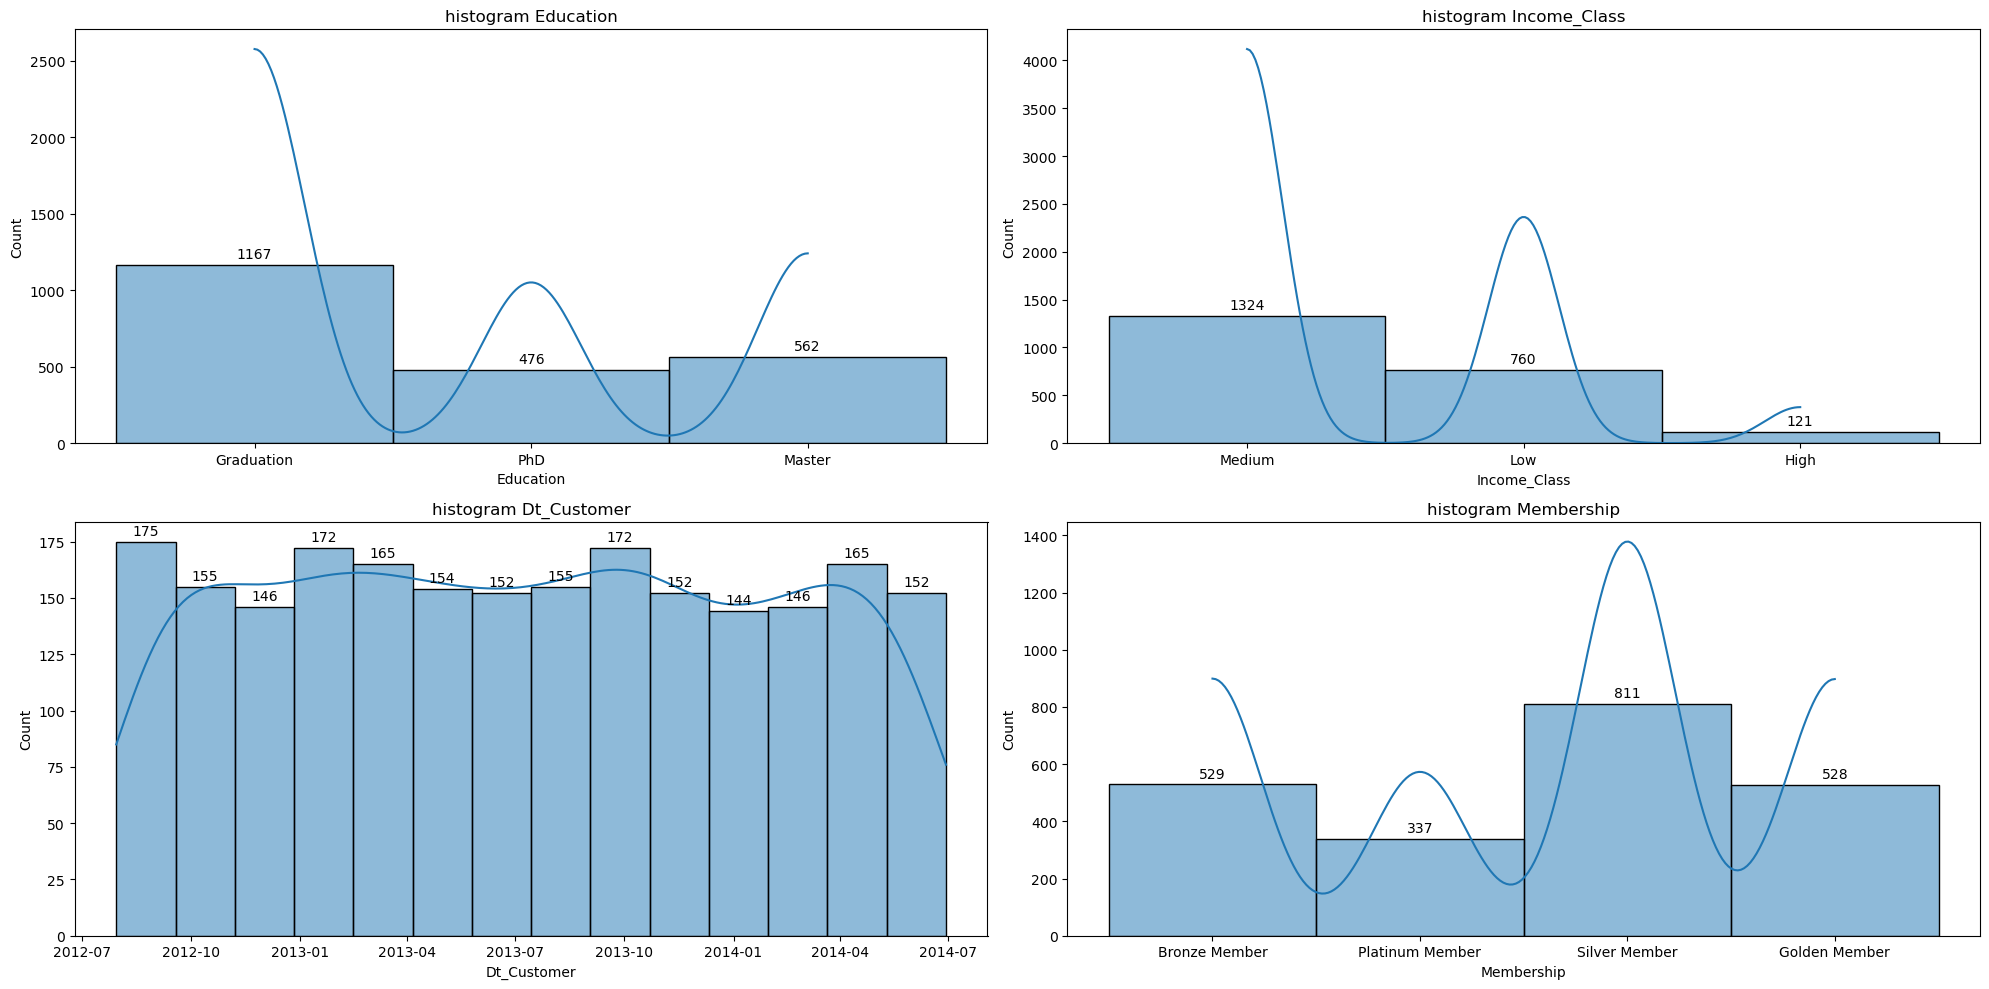

In [9]:
fig = plt.figure(figsize=(20,10)) # horizontal, vertikal

count = 0
for kolom in kategorik.columns:
    count += 1
    ax = plt.subplot(2,2,count)
    plot = sns.histplot(kategorik[kolom], kde=True, ax=ax)
    plt.title(f"histogram {kolom}")
    for p in plot.patches:
        ax.annotate (f'{int(p.get_height())}', 
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha='center', va='baseline', 
            xytext=(0, 5), 
            textcoords='offset points')

fig.tight_layout() # biar tidak tertumpuk
plt.show()

Komentar: 
* dominasi edukasi: Graduasi (termasuk lulusan SMA) 
* dominasi kelas: medium class
* dominasi membership: silver 

### income class

perlu diketahui bahwa standar kelas ekonomi ini menggunakan standar Pew Research tahun 2014 dimana pertimbangan bukan hanya melalui angka total annual income melainkan juga mempertimbangkan jumlah anggota rumahtangga dari si pemilik total annual income tersebut. 

perhitungan itu adalah sebagai berikut: 
| Household Member | middle income | upper income |
|------------------|---------------|--------------|
|        1         | $24,173 <     | $72,521 <    |
|        2         | $34,186 <     | $102,560 <   |
|        3         | $41,869 <     | $125,609 <   |
|        4         | $48,347 <     | $145,041 <   |
|        5         | $54,053 <     | $162,161 <   |

berdasarkan angka tersebut, dalam laporan ini kelas ekonomi (Income Class) dibafi menjadi 3: "Low" - berpendapatan lebih rendah dari middle income; "Medium" - dari middle income; dan "High" - dari upper income:

|     **TOTAL MEMBER: 2,205**     |   
|   Class   |   sum    |    %     |
|-----------|----------|----------|
|    Low    |   760    |  34.47%  |
|  Medium   |  1,324   |  60.05%  |
|   High    |   121    |  5.49%   |

### membership

untuk membership, penentuan menggunakan total ranking RFM (Recency - Frequency - Monetary) per yang dibagi menjadi 4 kelas.
* masing-masing RFM dikategorikan menjadi 4 kategori menggunakan 'qcut' function di pandas, dimana: 
    * Recency: rangking 1 mengindikasi jarak hari pembelian terpendek dan rangking 4 mengindikasi jarak hari pembelian terlama 
    * Frequency: rangking 1 mengindikasi jumlah kegiatan berbelanja di seluruh platform terbanyak dan rangking 4 mengindikasi jumlah paling sedikit
    * monetary: rangking 1 mengindikasi jumlah pembelian semua produk terbanyak dan rangking 4 mengindikasi jumlah pembelian paling sedikit

penglompokan berdasarkan total jumlah rangkin RFM adalah sebagai berikut: 

|           **TOTAL MEMBER: 2,205**         |
| Total RFM | Membership |   sum   |    %   |
|-----------|------------|---------|--------|
|   3-4     | Platinum   |   337   | 15.28% |
|   5-6     | Golden     |   528   | 23.59% |
|   7-9     | Silver     |   811   | 36.78% |
|  10-12    | Bronze     |   529   | 23.99% |


### household member

jumlah anggota rumahtangga per member diambil dari value marriage status dan jumlah anak dan remaja per member, dimana - 
* marriage status (status pernikahan) dibagi menjadi dua yaitu single (1 org) dan married (2 org) 
* ditambah dengan total jumlah anak dan remaja, maka akan terlihat seperti ini: 

c:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\User\AppData\Local\Temp\ipykernel_19828\3504463046.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1400x800 with 0 Axes>

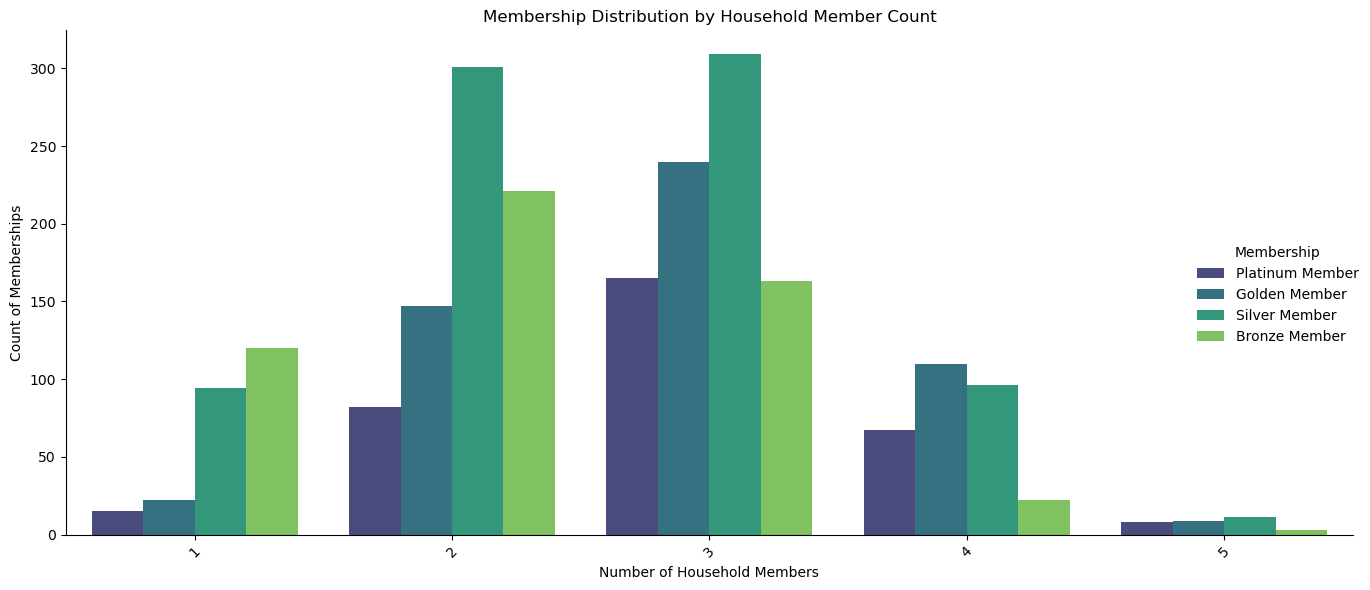

In [15]:
plt.figure(figsize=(14, 8))
sns.catplot(x='Household_Member', hue='Membership', kind='count', data=Cdata, height=6, aspect=2,
            hue_order=['Platinum Member', 'Golden Member', 'Silver Member', 'Bronze Member'], palette='viridis')
plt.title('Membership Distribution by Household Member Count')
plt.xlabel('Number of Household Members')
plt.ylabel('Count of Memberships')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


Kelompok terbanyak ada pada angka 2-3 penghuni rumah tangga, dan rata-rata berada di kelompok Bronze dan Silver 

### Correlation

Apabila dilihat dalam bentuk korelasi akan terlihat seperti berikut: 

<Axes: >

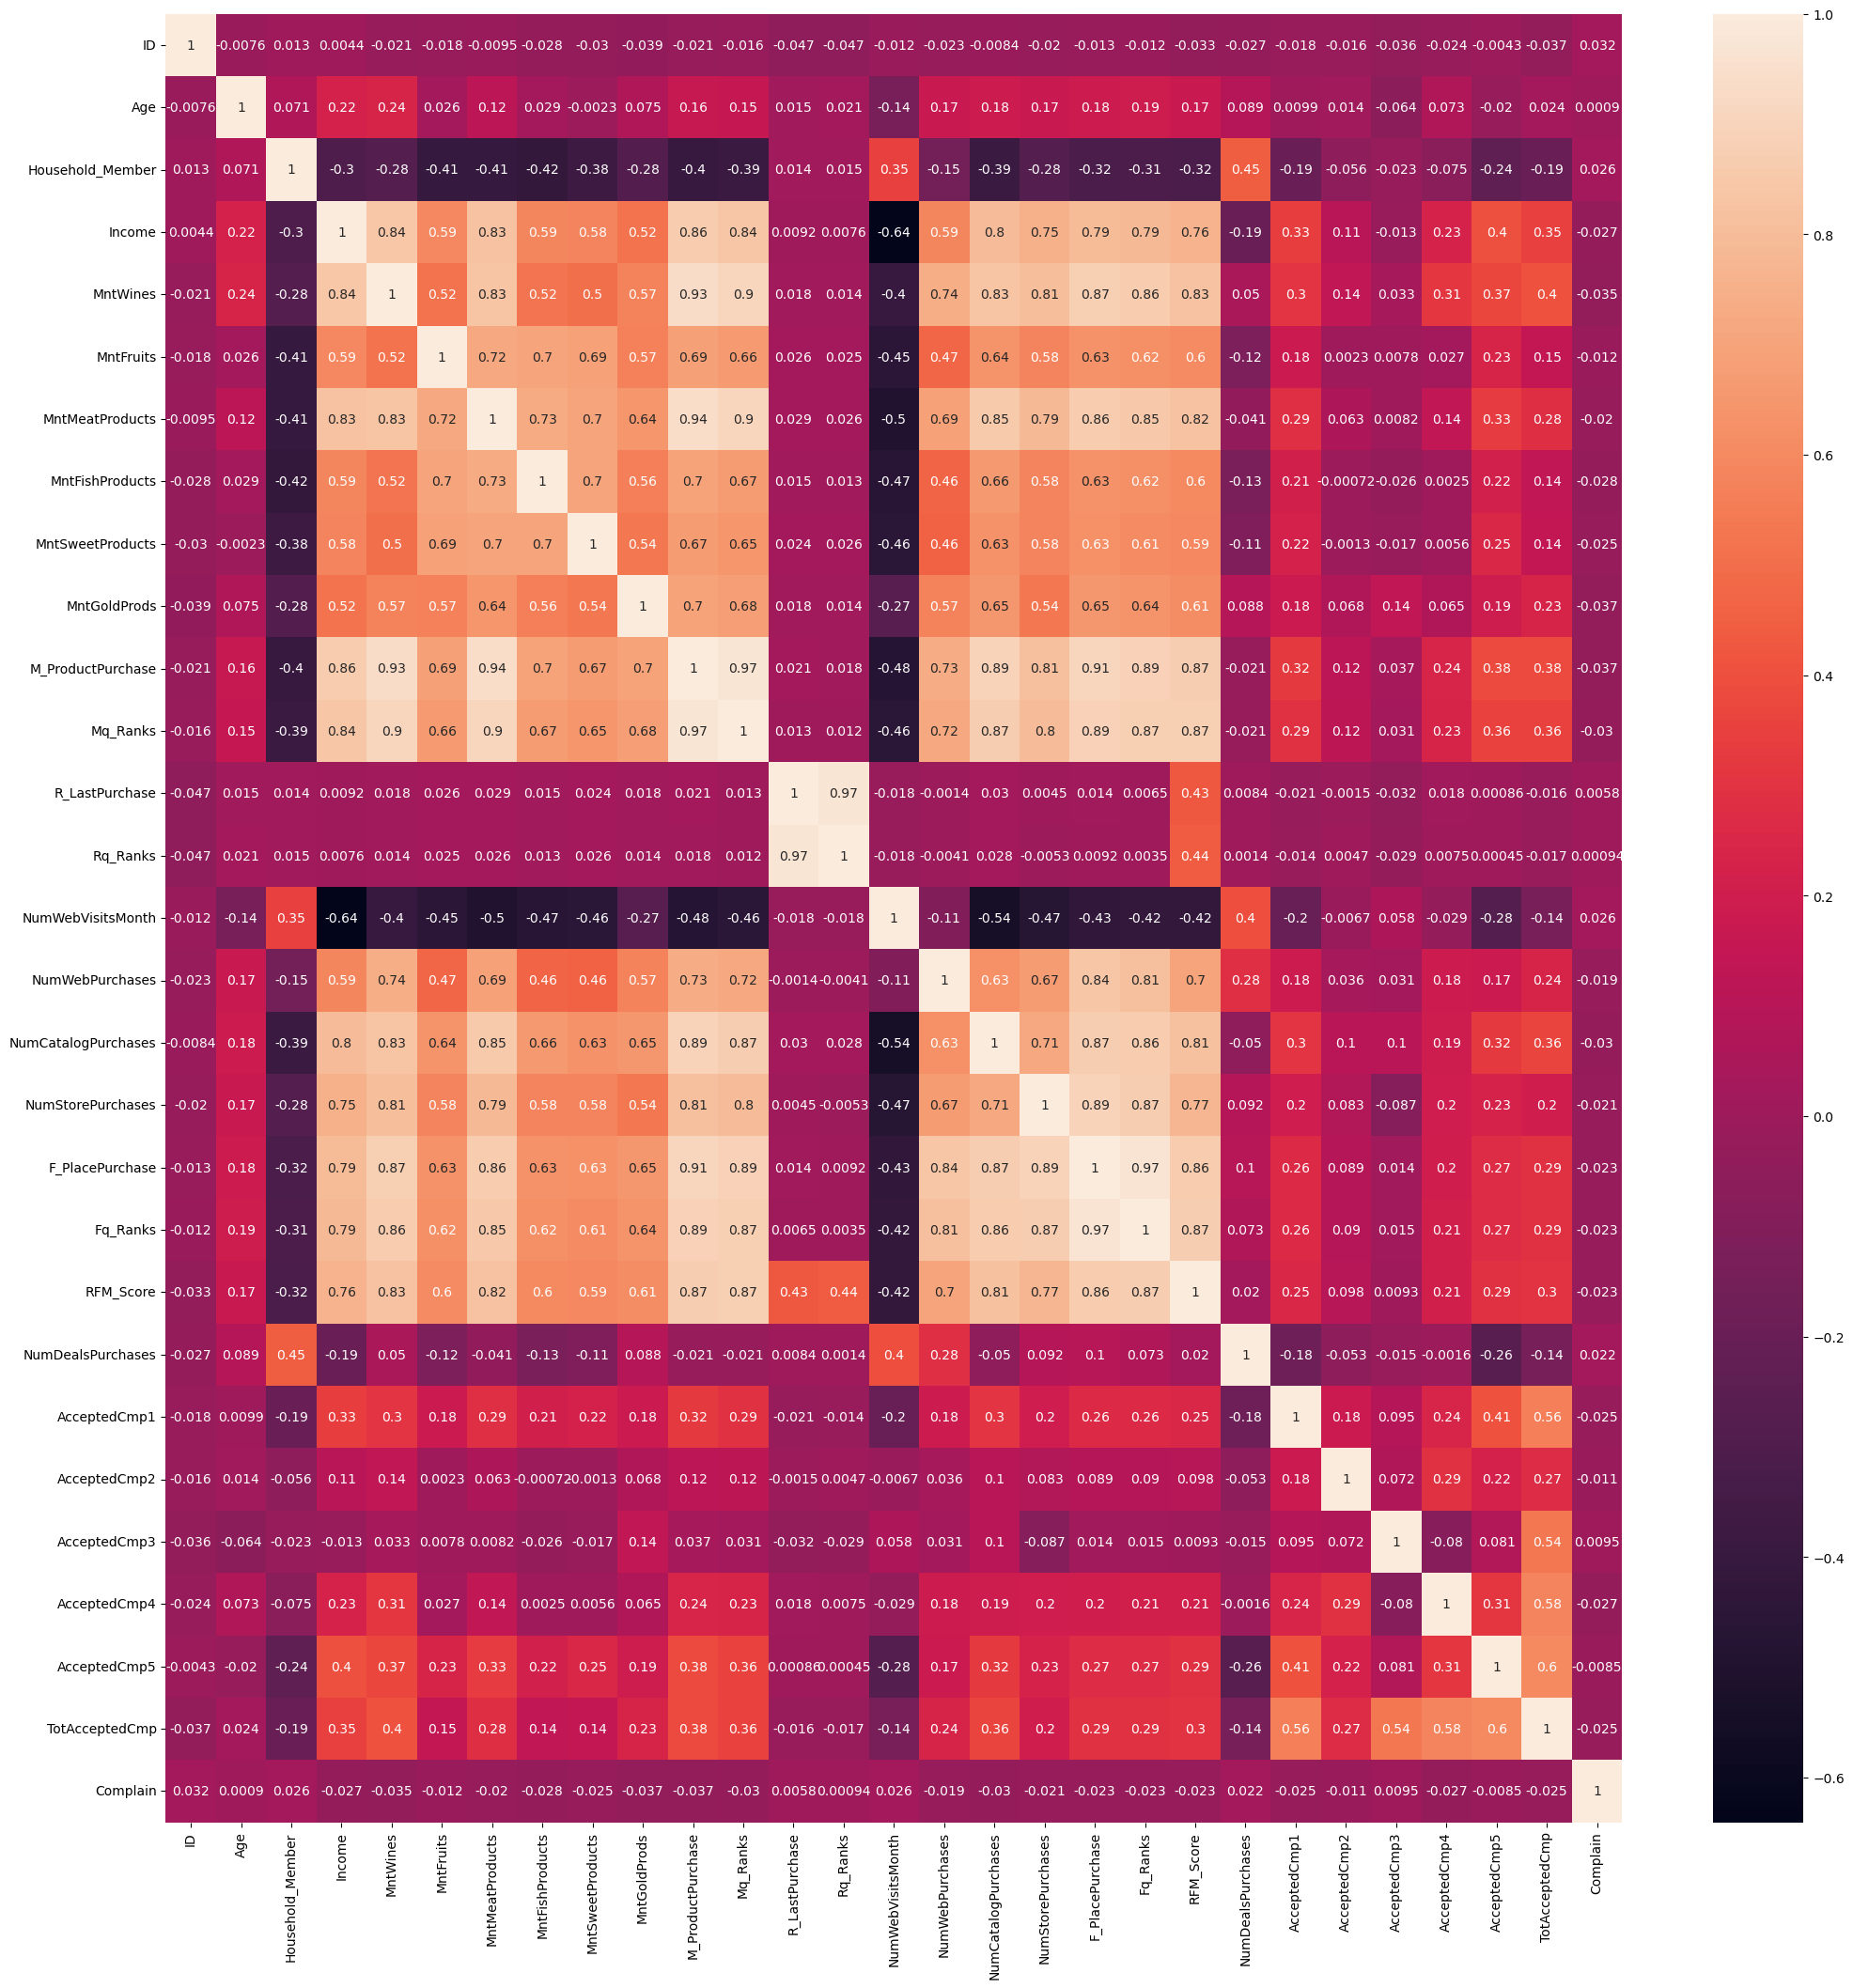

In [11]:
correlation = Cdata.corr(method='spearman', numeric_only=True)

plt.figure(figsize=(25,25))
sns.heatmap(correlation, annot=True)

dapat disimpulkan terdapat 2 poin korelasi: 
1. antara "Income" dengan produk "wine" dan "Meat" serta aktivitas belanja melalui "catalogue" dan "store" 
2. antara "household member" dengan jumlah "web visit" dan jumlah "deals purchase" 

### Wrap Up 1
Berdasarkan dari hasil distribusi numerical dan categorical, dapat disimpulkan bahwa customer Supermarket didominasi oleh:
Medium (Income Class) Silver (Membership), yang berpotensi merupakan anggota yang berumur kisaran 25-55 tahun berpendidikan maks S1, dan memiliki anggota rumah tangga sebanyak 2-3 orang

Namun, berdasarkan korelasi yaitu:
1. antara "Income" dengan produk "wine" dan "Meat" serta aktivitas belanja melalui "katalog" dan "store"
2. antara "household member" dengan jumlah "web visit" dan jumlah "deals purchase"

Maka terdapat kemungkinan kelompok terbesar hanyalah 1 dari target market yang sebenarnya ada untuk dikembangkan, seperti misalnya pasar market barang mewah (wine dan meat). Hal ini dikarenakan adanya potensi pembelian wine dan meat yang semakin tinggi seiring dengan tingginya pendapatan, namun disaat bersamaan adanya korelasi antara anggota keluarga dengan diskon yang di claim oleh peserta member

### Campaign

 diketahui bahwa angka partisipasi kampanye dinilai kecil. mari kita lihat penjabarannya:

#### Partisipasi berdasarkan Income Class

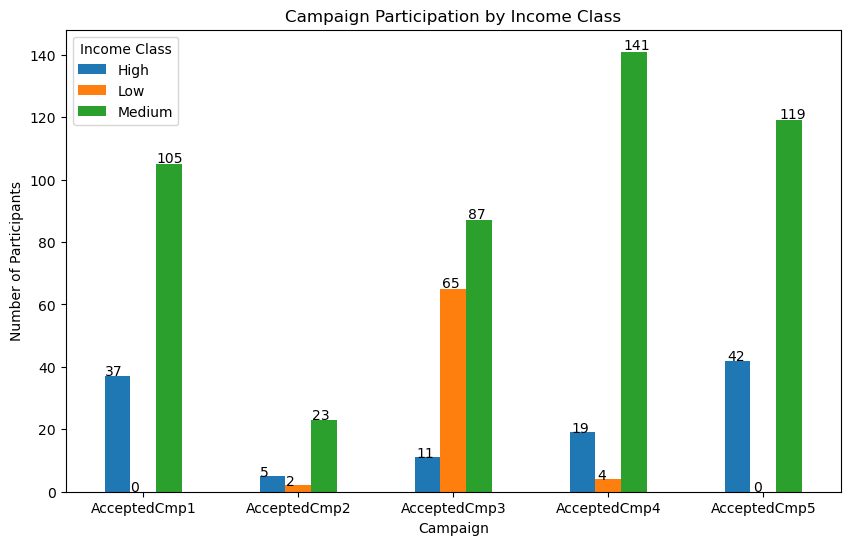

In [12]:
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
cmp_by_income = Cdata.groupby('Income_Class')[campaigns].sum().T

# Plotting
ax = cmp_by_income.plot(kind='bar', figsize=(10, 6))
plt.title('Campaign Participation by Income Class')
plt.xlabel('Campaign')
plt.ylabel('Number of Participants')
plt.xticks(rotation=0)
plt.legend(title='Income Class')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

Dari total member 2.205 orang: 
* total partisipan -
    * kampanye 1: 142 orang (6.4%)
    * kampanye 2: 30 orang (1.4%)
    * kampanye 3: 163 orang (7.4%)
    * kampanye 4: 164 orang (7.4%)
    * kampanye 5: 161 orang (7.3%)
* partisipan tertinggi berasala dari Income Class Medium dengan angka tertinggi di 141 orang pada kampanye ke 4 atau setara 6.4% dari total seluruh member atau 10.56% dari total kelas Medium
* dari kelima kampanye, partisipan tertinggi selalu dimenangkan oleh kelas Medium 
* jika dilihat dari total partisipan, maka hanya kampanye 2 yang memiliki tingkat partisipasi sangat rendah hingga dibawah 50 orang (sementara yang lainnya berada diangka 150an orang)
* hanya kampanye 3 yang memiliki angka partisipasi yang cukup signifikan dari kelas Low yaitu 65 orang atau setara 3% dari total seluruh member atau 8.6% dari total kelas Low

#### Partisipasi berdasarkan Membership 

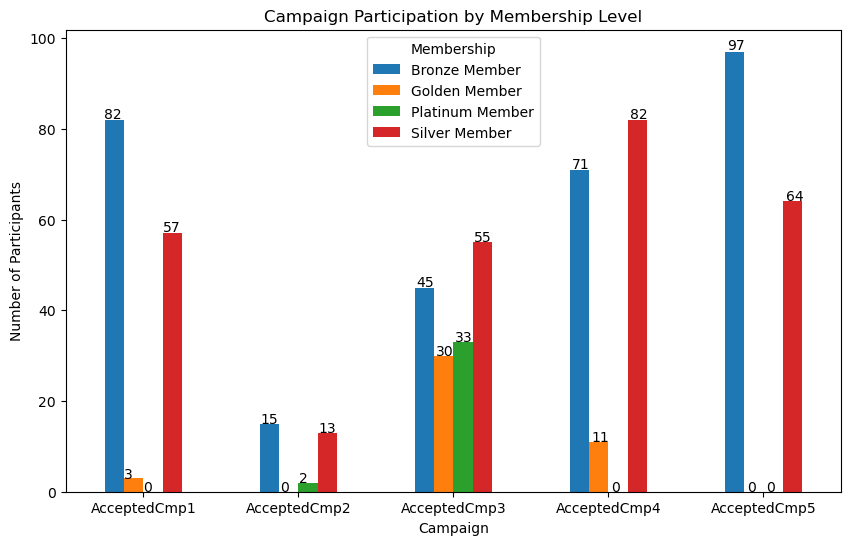

In [13]:
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
cmp_by_membership = Cdata.groupby('Membership')[campaigns].sum().T

ax = cmp_by_membership.plot(kind='bar', figsize=(10, 6))
plt.title('Campaign Participation by Membership Level')
plt.xlabel('Campaign')
plt.ylabel('Number of Participants')
plt.xticks(rotation=0)
plt.legend(title='Membership')

# Adding labels
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

Dari total member 2,205 orang: 
* total partisipan -
    * kampanye 1: 142 orang (6.4%)
    * kampanye 2: 30 orang (1.4%)
    * kampanye 3: 163 orang (7.4%)
    * kampanye 4: 164 orang (7.4%)
    * kampanye 5: 161 orang (7.3%)
* Member Bronze dan Silver adalah partisipan teraktif dengan rata-rata 55-60 orang berpartisipasi per kampanye atau setara 2.6% dari total jumlah seluruh member atau 10.9% dari total member Bronze dan 7% dari total member Silver
*  Member Platinum hanya berpartisi pada 2 kampanye yaitu 2 dan 3 

### Total partisipan

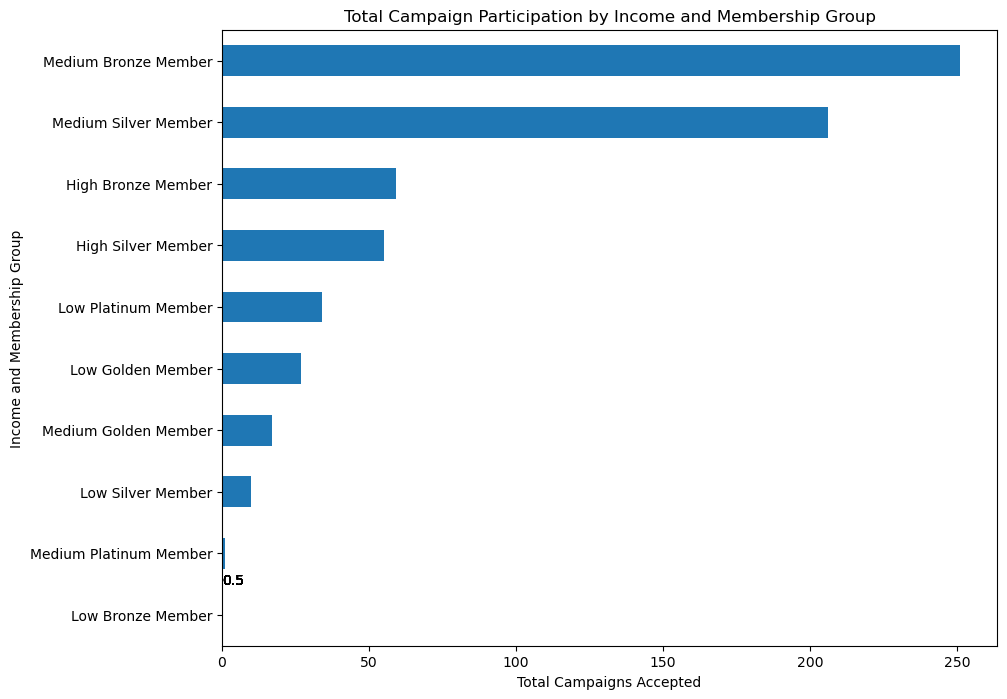

In [14]:
Cdata['Income_Membership'] = Cdata['Income_Class'] + ' ' + Cdata['Membership']

# Group by the new combined category and sum total accepted campaigns
total_cmp_by_group = Cdata.groupby('Income_Membership')['TotAcceptedCmp'].sum().sort_values()

# Plotting
ax = total_cmp_by_group.plot(kind='barh', figsize=(10, 8))
plt.title('Total Campaign Participation by Income and Membership Group')
plt.xlabel('Total Campaigns Accepted')
plt.ylabel('Income and Membership Group')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

Dari total member 2.205 orang:
* total partisipan  per income-
    * Low = 71 (9,34%)
    * Medium = 475 (35,88%)
    * **High = 114 (94,22%)**
* total partisipan per membership-
    * **Bronze = 310 (58,6%)**
    * Silver = 271 (33,42%)
    * Gold = 44 (8,33%)
    * Platinum = 35 (10.39%)

Peserta terbesar yang ikut serta dalam kampanye total adalah berasal dari kelompok Medium Bronze, diikuti oleh Medium Silver dan High Bronze.   
Apabila dilihat dari segi kelas dan membership, kelas high income justru yang paling rajin ikut berpartisipasi saat diskon dengan angka hampir mencapai 100% , walaupun dalam segi RFM, cukup rendah yaitu pada level membership Bronze. 

Peserta terbesar yang ikut serta dalam kampanye total adalah berasal dari kelompok Medium Bronze, diikuti oleh Medium Silver dan High Bronze.   
Apabila dilihat dari segi kelas dan membership, kelas high income justru yang paling rajin ikut berpartisipasi saat diskon dengan angka hampir mencapai 100% , walaupun dalam segi RFM, cukup rendah yaitu pada level membership Bronze. 



## Wrap Up 2

Sebelumnya dinyatakan bahwa berdasarkan hitungan keseluruhan kelompok terbesar adalah  Medium (Income Class) Silver (Membership), yang berpotensi merupakan anggota yang berumur kisaran 25-55 tahun berpendidikan maks S1, dan memiliki anggota rumah tangga sebanyak 2-3 orang. 

Namun menariknya -  diluar fakta bahwa jumlah total partisipasi kegiatan kampanye marketing yang kecil (<10%) - partisipan dari kelompok High (Income Class),  Bronze (Membership) maupun Silver (Membership) secara persentase hampir 100%. Hal ini jelas menggarisbawahi bahwa kegiatan kampanye pemasaran yang selama ini dilaksanakan sedikit kurang tepat mengingat terdapat grup besar yang tidak tertarget dengan baik. 

**Namun apakah artinya kampanye pemasaran yang selama ini dapat dinilai gagal? Bagaimana dengan hubungan 2 korelasi yang telah disebutkan sebelumnya?**


# 2. PURCHASING MEMBERSHIP 

## Purchasing by Income

In [19]:
from tabulate import tabulate 

Purchase_Income = [
    {"Income":"**MEAT**", "Low": "760", "Medium": "1324", "High": "121"},
    {"Income":"Total Purchase", "Low": "18487", "Medium": "283154", "High": "62881"},
    {"Income":"Ave. 1 org", "Low": "24,33", "Medium": "213,86", "High": "519,68"},
    {"Income":"**FISH**", "Low": "760", "Medium": "1324", "High": "121"},
    {"Income":"Total Purchase", "Low": "5498", "Medium": "66238", "High": "11517"},
    {"Income":"Ave. 1 org", "Low": "7,23", "Medium": "50,03", "High": "95,18"},
    {"Income":"**FRUITS**", "Low": "760", "Medium": "1324", "High": "121"},
    {"Income":"Total Purchase", "Low": "3838", "Medium": "45648", "High": "8733"},
    {"Income":"Ave. 1 org", "Low": "5,05", "Medium": "34,48", "High": "72,17"},
    {"Income":"**WINES", "Low": "760", "Medium": "1324", "High": "121"},
    {"Income":"Total Purchase", "Low": "26046", "Medium": "568848", "High": "80199"},
    {"Income":"Ave. 1 org", "Low": "34,27", "Medium": "429,64", "High": "662,80"},
    {"Income":"**SWEET**", "Low": "760", "Medium": "1324", "High": "121"},
    {"Income":"Total Purchase", "Low": "3931", "Medium": "46913", "High": "8974"},
    {"Income":"Ave. 1 org", "Low": "5,17", "Medium": "35,43", "High": "74,17"},
    {"Income":"**GOLD**", "Low": "760", "Medium": "1324", "High": "121"},
    {"Income":"Total Purchase", "Low": "12869", "Medium": "75402", "High": "8875"},
    {"Income":"Ave. 1 org", "Low": "16,93", "Medium": "56,95", "High": "73,35"},
]

def avePurchaseIncome():
    print(tabulate(Purchase_Income, headers="keys", tablefmt="pretty"))

avePurchaseIncome()

+----------------+-------+--------+--------+
|     Income     |  Low  | Medium |  High  |
+----------------+-------+--------+--------+
|    **MEAT**    |  760  |  1324  |  121   |
| Total Purchase | 18487 | 283154 | 62881  |
|   Ave. 1 org   | 24,33 | 213,86 | 519,68 |
|    **FISH**    |  760  |  1324  |  121   |
| Total Purchase | 5498  | 66238  | 11517  |
|   Ave. 1 org   | 7,23  | 50,03  | 95,18  |
|   **FRUITS**   |  760  |  1324  |  121   |
| Total Purchase | 3838  | 45648  |  8733  |
|   Ave. 1 org   | 5,05  | 34,48  | 72,17  |
|    **WINES     |  760  |  1324  |  121   |
| Total Purchase | 26046 | 568848 | 80199  |
|   Ave. 1 org   | 34,27 | 429,64 | 662,80 |
|   **SWEET**    |  760  |  1324  |  121   |
| Total Purchase | 3931  | 46913  |  8974  |
|   Ave. 1 org   | 5,17  | 35,43  | 74,17  |
|    **GOLD**    |  760  |  1324  |  121   |
| Total Purchase | 12869 | 75402  |  8875  |
|   Ave. 1 org   | 16,93 | 56,95  | 73,35  |
+----------------+-------+--------+--------+


C:\Users\User\AppData\Local\Temp\ipykernel_19828\1744367317.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=melted_data, x='Product', y='Count', hue='Income_Class', ci=None)


ValueError: Format specifier missing precision

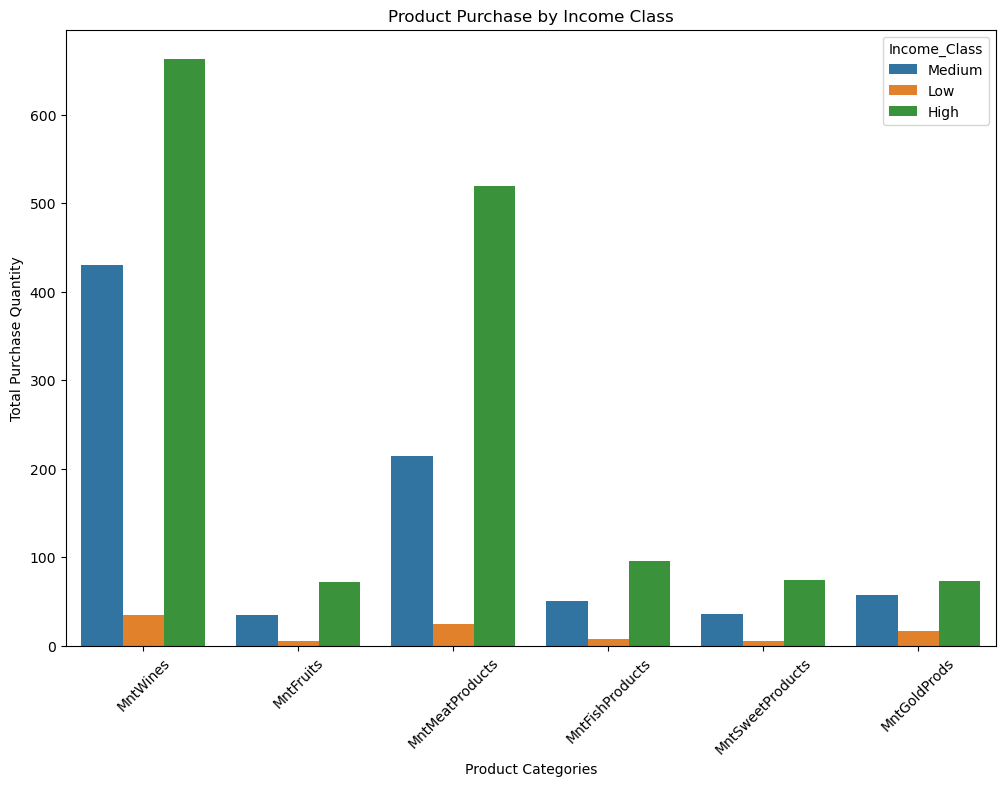

In [23]:
melted_data = Cdata.melt(id_vars=['Income_Class'],
                         value_vars=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],
                         var_name='Product', value_name='Count')

plt.figure(figsize=(12,8))
ax = sns.barplot(data=melted_data, x='Product', y='Count', hue='Income_Class', ci=None)
plt.title('Product Purchase by Income Class')
plt.xlabel('Product Categories')
plt.ylabel('Total Purchase Quantity')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.if'),
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha= 'center', va= 'center',
                xytext= (0,10), 
                textcoords= 'offset points')

plt.tight_layout()
plt.show()

## Purchasing by Membership 

In [18]:
from tabulate import tabulate 

Purchase_Membership = [
    {"Income":"**MEAT**", "bronze": "529", "silver": "811", "gold": "528", "platinum": "337"},
    {"Income":"Total Purchase", "bronze": "191449", "silver": "155349", "gold": "14221", "platinum": "3494"},
    {"Income":"Ave. 1 org", "bronze": "361,91", "silver": "191,55", "gold": "26,93", "platinum": "10,47"},
    {"Income":"**FISH**", "bronze": "529", "silver": "811", "gold": "528", "platinum": "337"},
    {"Income":"Total Purchase", "bronze": "40570", "silver": "36548", "gold": "4641", "platinum": "1494"},
    {"Income":"Ave. 1 org", "bronze": "76,69", "silver": "45,07", "gold": "8,79", "platinum": "4,43"},
    {"Income":"**FRUITS**", "bronze": "529", "silver": "811", "gold": "528", "platinum": "337"},
    {"Income":"Total Purchase", "bronze": "28240", "silver": "26019", "gold": "2970", "platinum": "990"},
    {"Income":"Ave. 1 org", "bronze": "53,38", "silver": "32,08", "gold": "5,63", "platinum": "2,94"},
    {"Income":"**WINES", "bronze": "529", "silver": "811", "gold": "528", "platinum": "337"},
    {"Income":"Total Purchase", "bronze": "341081", "silver": "299213", "gold": "29329", "platinum": "5470"},
    {"Income":"Ave. 1 org", "bronze": "644,77", "silver": "368,94", "gold": "55,55", "platinum": "16,23"},
    {"Income":"**SWEET**", "bronze": "529", "silver": "811", "gold": "528", "platinum": "337"},
    {"Income":"Total Purchase", "bronze": "30001", "silver": "25892", "gold": "2944", "platinum": "981"},
    {"Income":"Ave. 1 org", "bronze": "56,71", "silver": "31,93", "gold": "5,58", "platinum": "2,91"},
    {"Income":"**GOLD**", "bronze": "529", "silver": "811", "gold": "528", "platinum": "337"},
    {"Income":"Total Purchase", "bronze": "39840", "silver": "45080", "gold": "8958", "platinum": "3268"},
    {"Income":"Ave. 1 org", "bronze": "75,31", "silver": "55,59", "gold": "16,97", "platinum": "9,70"},
]

def avePurchaseMembership():
    print(tabulate(Purchase_Membership, headers="keys", tablefmt="pretty"))

avePurchaseMembership()

+----------------+--------+--------+-------+----------+
|     Income     | bronze | silver | gold  | platinum |
+----------------+--------+--------+-------+----------+
|    **MEAT**    |  529   |  811   |  528  |   337    |
| Total Purchase | 191449 | 155349 | 14221 |   3494   |
|   Ave. 1 org   | 361,91 | 191,55 | 26,93 |  10,47   |
|    **FISH**    |  529   |  811   |  528  |   337    |
| Total Purchase | 40570  | 36548  | 4641  |   1494   |
|   Ave. 1 org   | 76,69  | 45,07  | 8,79  |   4,43   |
|   **FRUITS**   |  529   |  811   |  528  |   337    |
| Total Purchase | 28240  | 26019  | 2970  |   990    |
|   Ave. 1 org   | 53,38  | 32,08  | 5,63  |   2,94   |
|    **WINES     |  529   |  811   |  528  |   337    |
| Total Purchase | 341081 | 299213 | 29329 |   5470   |
|   Ave. 1 org   | 644,77 | 368,94 | 55,55 |  16,23   |
|   **SWEET**    |  529   |  811   |  528  |   337    |
| Total Purchase | 30001  | 25892  | 2944  |   981    |
|   Ave. 1 org   | 56,71  | 31,93  | 5,58  |   2

C:\Users\User\AppData\Local\Temp\ipykernel_19828\1741154797.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=melted_data, x='Product', y='Count', hue='Membership', ci=None)


ValueError: Format specifier missing precision

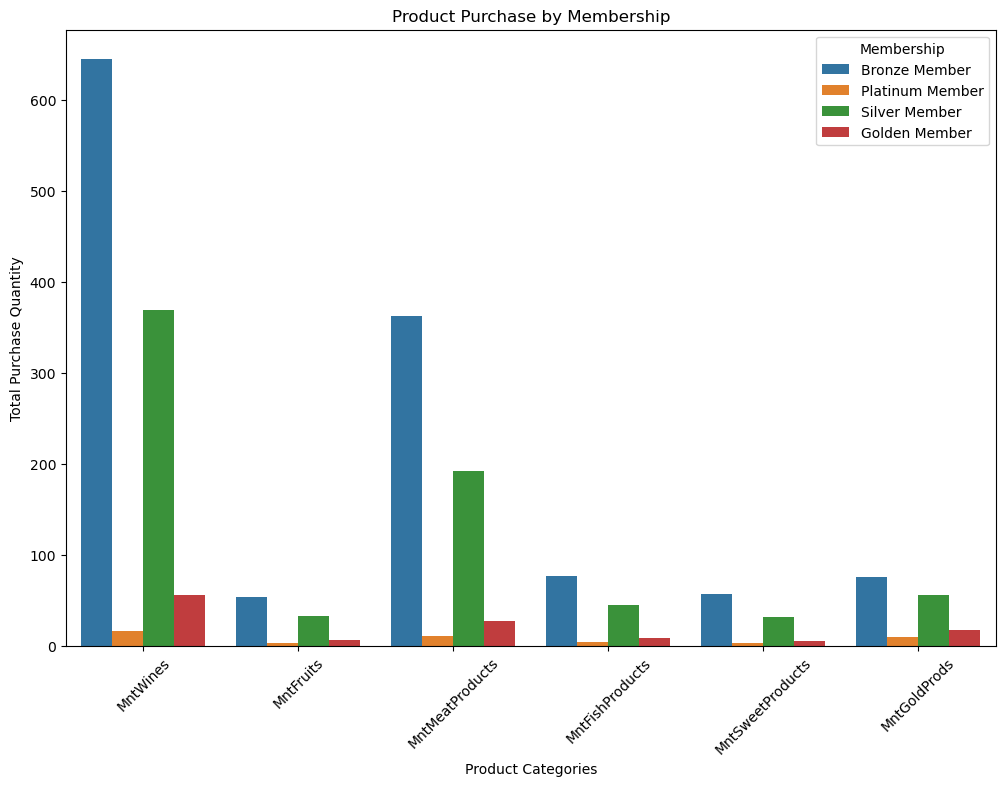

In [24]:
melted_data = Cdata.melt(id_vars=['Membership'],
                         value_vars=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],
                         var_name='Product', value_name='Count')

plt.figure(figsize=(12,8))
ax = sns.barplot(data=melted_data, x='Product', y='Count', hue='Membership', ci=None)
plt.title('Product Purchase by Membership')
plt.xlabel('Product Categories')
plt.ylabel('Total Purchase Quantity')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.if'),
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha= 'center', va= 'center',
                xytext= (0,10), 
                textcoords= 'offset points')

plt.tight_layout()
plt.show()

## Wrap Up 3

Kelas Medium terlihat menguasai jumlah pembelian namun apabila dirata-ratakan, jumlah rata-rata pembelian tertinggi jatuh pada individu kelas High.  Sementara itu per membership, kelompok Bronze sekali lagi dominan diantara kelompok lainnya diikuti oleh kelompok Silver. 
Artinya, walaupun jumlah member Medium Silver yang besar, secara kualitas transaksi per individu member High Bronze adalah yang terbaik = Quality > Quantity. 

Hal ini bisa berarti 2 aksi: 
Re-targeting menuju ke target pasar yang besar, atau
Mencari cara agar kelompok yang masuk ke kategori High Bronze bisa bertambah secara quantity, atau bahkan naik dari Bronze menuju ke silver

## channel

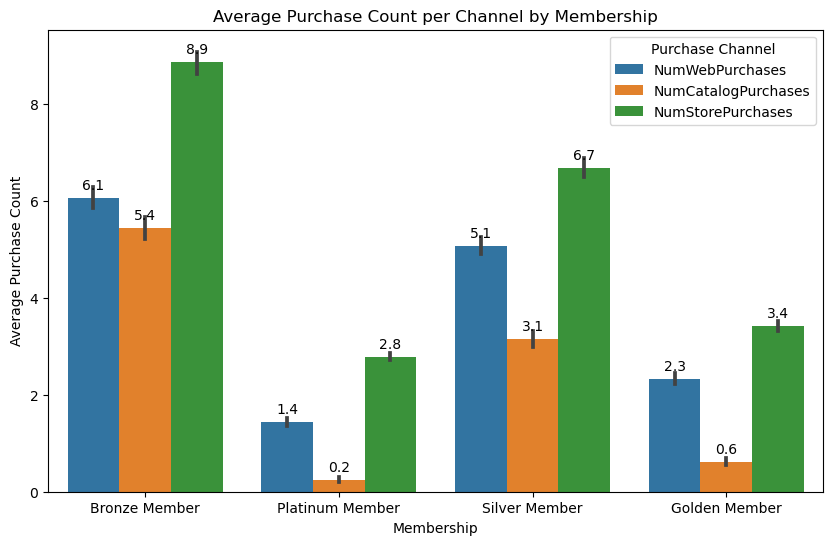

In [27]:
melted_data = Cdata.melt(id_vars='Membership', value_vars=['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'],
                                     var_name='PurchaseChannel', value_name='AverageCount')

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=melted_data, x='Membership', y='AverageCount', hue='PurchaseChannel')
plt.title('Average Purchase Count per Channel by Membership')
plt.xlabel('Membership')
plt.ylabel('Average Purchase Count')
plt.legend(title='Purchase Channel')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.show()

Berdasarkan rata-rata jumlah pembelian, “store” (toko) tetap menjadi favorit untuk semua kalangan membership: 
* Low income class  paling banyak menggunakan web
* Semantara Medium dan High income class menggunaka Catalogue dan pergi ke toko. 

Secara garis besar, pengguna web terutama untuk member Bronze dan Silver cukup berimbang dengan  pengunjung store maupun pengguna catalogue. Namun perlu diperhatikan pada kelompok Golden dan Platinum (Low maupun medium income) jauh lebih banyak memilih untuk datang ke toko daripada yang lainnya. 


## web check

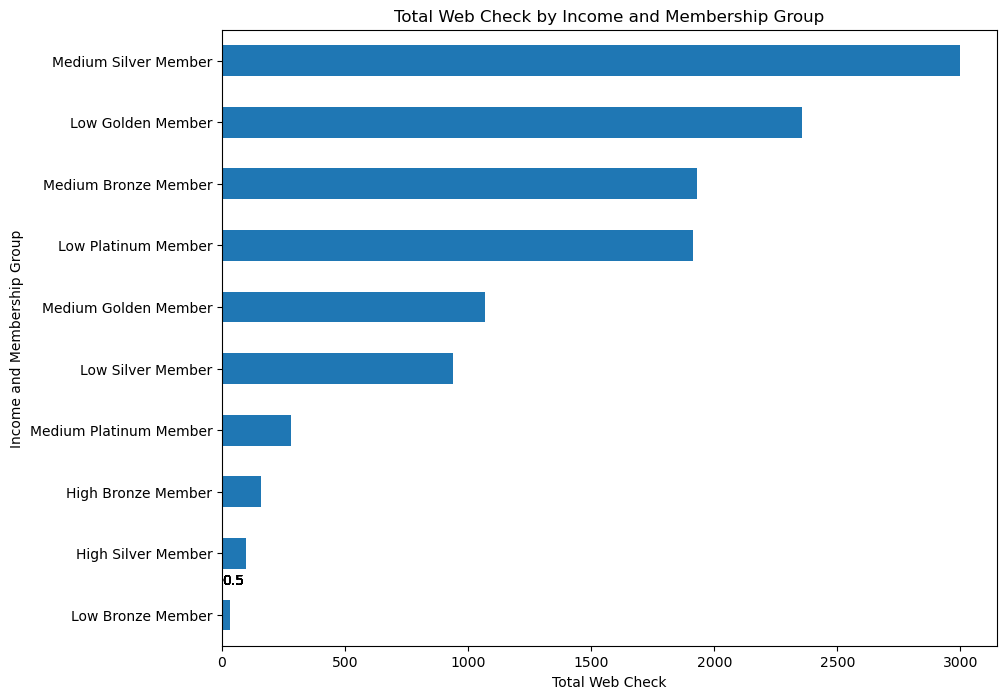

In [34]:
Cdata['Income_Membership'] = Cdata['Income_Class'] + ' ' + Cdata['Membership']
total_cmp_by_group = Cdata.groupby('Income_Membership')['NumWebVisitsMonth'].sum().sort_values()

ax = total_cmp_by_group.plot(kind='barh', figsize=(10, 8))
plt.title('Total Web Check by Income and Membership Group')
plt.xlabel('Total Web Check')
plt.ylabel('Income and Membership Group')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

Medium SIlver adalah grup yang paling banyak melakukan pengecekan pada web,  diikuti oleh kelompok Low Golden.

Dalam perbandingan akan seperti ini: 

In [26]:
from tabulate import tabulate 

Purchase_webcheckIncome = [
    {"Income":"**ID**", "Low": "760", "Medium": "1324", "High": "121"},
    {"Income":"Total Web Visit", "Low": "5240", "Medium": "6275", "High": "253"},
    {"Income":"Ave. 1 org", "Low": "6,89", "Medium": "4,74", "High": "2,09"}
]

Purchase_webcheckMembership = [
    {"Income":"**ID**", "bronze": "529", "silver": "811", "gold": "528", "platinum": "337"},
    {"Income":"Total Web Visit", "bronze": "2117", "silver": "4032", "gold": "3426", "platinum": "2193"},
    {"Income":"Ave. 1 org", "bronze": "4,00", "silver": "4,97", "gold": "6,49", "platinum": "6,51"}
]

def avePurchasewebcheckIncome():
    print(tabulate(Purchase_webcheckIncome, headers="keys", tablefmt="pretty"))

def avePurchasewebcheckMembership():
    print(tabulate(Purchase_webcheckMembership, headers="keys", tablefmt="pretty"))

avePurchasewebcheckIncome()
avePurchasewebcheckMembership()

+-----------------+------+--------+------+
|     Income      | Low  | Medium | High |
+-----------------+------+--------+------+
|     **ID**      | 760  |  1324  | 121  |
| Total Web Visit | 5240 |  6275  | 253  |
|   Ave. 1 org    | 6,89 |  4,74  | 2,09 |
+-----------------+------+--------+------+
+-----------------+--------+--------+------+----------+
|     Income      | bronze | silver | gold | platinum |
+-----------------+--------+--------+------+----------+
|     **ID**      |  529   |  811   | 528  |   337    |
| Total Web Visit |  2117  |  4032  | 3426 |   2193   |
|   Ave. 1 org    |  4,00  |  4,97  | 6,49 |   6,51   |
+-----------------+--------+--------+------+----------+


* Secara individu, rata-rata tertinggi pengunjung web adalah mereka dari kelompok Low Platinum. 

* High income 3x lebih rendah dibanding dengan Low Income, namun dalam hal membership perbedaan tidak terlalu signifikan. 

## deals taken

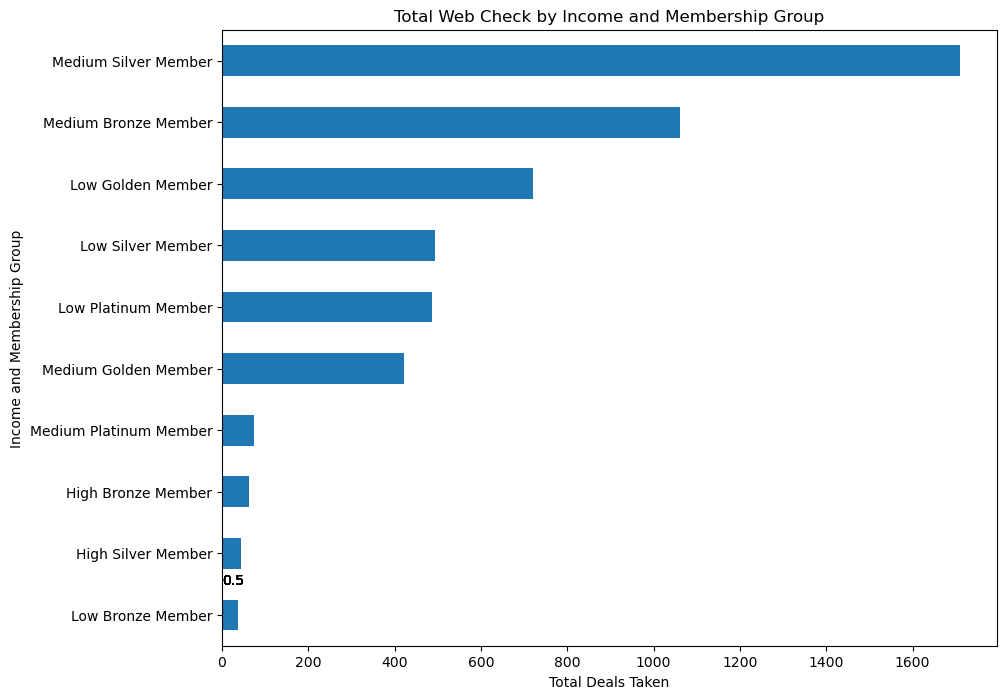

In [35]:
Cdata['Income_Membership'] = Cdata['Income_Class'] + ' ' + Cdata['Membership']
total_cmp_by_group = Cdata.groupby('Income_Membership')['NumDealsPurchases'].sum().sort_values()

ax = total_cmp_by_group.plot(kind='barh', figsize=(10, 8))
plt.title('Total Web Check by Income and Membership Group')
plt.xlabel('Total Deals Taken')
plt.ylabel('Income and Membership Group')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

Medium SIlver adalah grup yang paling banyak claim deals saat bertransaksi,  diikuti oleh kelompok Medium Bronze 

Dalam perbandingan akan seperti ini:

In [29]:
from tabulate import tabulate 

Purchase_webcheckIncome = [
    {"Income":"**ID**", "Low": "760", "Medium": "1324", "High": "121"},
    {"Income":"Total Deals Taken", "Low": "1837", "Medium": "3269", "High": "106"},
    {"Income":"Ave. 1 org", "Low": "2,42", "Medium": "2,47", "High": "0,88"}
]

Purchase_webcheckMembership = [
    {"Income":"**ID**", "bronze": "529", "silver": "811", "gold": "528", "platinum": "337"},
    {"Income":"Total Deals Taken", "bronze": "1163", "silver": "2246", "gold": "1142", "platinum": "561"},
    {"Income":"Ave. 1 org", "bronze": "2,20", "silver": "2,77", "gold": "2,16", "platinum": "1,66"}
]

def avePurchasewebcheckIncome():
    print(tabulate(Purchase_webcheckIncome, headers="keys", tablefmt="pretty"))

def avePurchasewebcheckMembership():
    print(tabulate(Purchase_webcheckMembership, headers="keys", tablefmt="pretty"))

avePurchasewebcheckIncome()
avePurchasewebcheckMembership()

+-------------------+------+--------+------+
|      Income       | Low  | Medium | High |
+-------------------+------+--------+------+
|      **ID**       | 760  |  1324  | 121  |
| Total Deals Taken | 1837 |  3269  | 106  |
|    Ave. 1 org     | 2,42 |  2,47  | 0,88 |
+-------------------+------+--------+------+
+-------------------+--------+--------+------+----------+
|      Income       | bronze | silver | gold | platinum |
+-------------------+--------+--------+------+----------+
|      **ID**       |  529   |  811   | 528  |   337    |
| Total Deals Taken |  1163  |  2246  | 1142 |   561    |
|    Ave. 1 org     |  2,20  |  2,77  | 2,16 |   1,66   |
+-------------------+--------+--------+------+----------+


* Secara individu, rata-rata tertinggi pengguna deals adalah mereka dari kelompok Medium SIlver - 
* High income bahkan dibawah angka 1, menunjukan rendahnya ketertarikan high income terhadap deals. 


## Wrap Up 4

Channel yang digunakan tidak banyak berpengaruh bagi member Bronze maupun Silver, namun sangat kentara pilihan untuk datang ke Toko dibandingkan website pada member Gold dan Platinum. 
Meski demikian, dalam konteks sales atau deals Low Platinum yang paling banyak cek website walaupun yang pada akhirnya yang mengambil deals tersebut adalah Medium SIlver. Alasannya bisa diperkirakan: 

* **Sales kurang menarik atau tidak sesuai dengan kebutuhan low income yang terutama sering berbelanja**

Apabila yang dijadikan deals sering kali adalah Wine, maka ini masuk akal: Wine bukanlah kebutuhan penting apabila terdapat budget tertentu terutama untuk rumah tangga 2-3 orang. Namun, untuk Medium Income dan High Income, deals pada wine dan meat tentunya sangat menggiurkan sebagai ajang rekreasi.

# KESIMPULAN DAN REKOMENDASI

## Kesimpulan

Demografi terbanyak adalah Middle Silver yang juga rumah tangga dengan anggota 2-3 orang:
* Who
    * Walaupun Golden dan Platinum member adalah Medium dan Low Income Class, High Income lah yang paling rajin ikut dalam kampanye 
* What
    * Wine dan daging adalah terpopuler. Walaupun angka penjualan sangat besar di kelas Medium, power purchase tetap berada pada kelas High

Artinya: 
Kampanye yang berjalan selama ini lebih menjawab kebutuhan dari High Income walaupun dari segi RFM, mereka berada di Q3 dan 4 (Bronze, Silver). 

PIlihannya adalah 2: 
Retargeting market, atau
Growing keanggotaan high income, dimulai dari Medium class. 


## Rekomendasi

Diperlukan pengkajian lebih lanjut untuk menentukan pilihan mana yang lebih baik:

* Retargeting
    * Sales pada produk primer seperti pangan ikan, daging, sayur. Pastikan pemasangan iklan yang besar dan mencolok di toko dan info yang jelas di Website. 
* Growing
    * Perbanyak pilihan dalam catalog dan di toko terutama untuk produk mewah seperti wine, daging berkelas dan keju. Penekanan pada experience dalam berbelanja adalah kuncinya

Namun Hati-hati!
Retargeting artinya banyak permainan dan perbandingan harga namun pasar yang besar bisa menutup kerugian apabila dilakukan perhitungan yang tepat. 

Lain halnya dengan growing karena dengan high class bukan lagi soal harga saja namun juga pengalaman berbelanja. 

Karena jumlah demografi yang tidak besar, ada baiknya tetap mengincar kelas Medium (diluar hasil laporan Pew Research mengenai dilemma kelas menengah yang kemungkinan akan mempengaruhi pola berbelanja kelas menengah nantinya) 
